In [1]:
from __future__ import print_function
#import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 100 # experiment with this
learning_rate = 0.01 # experiment with this

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (60000,)
y_test shape: (10000,)


In [5]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [16]:
num_units_layer1 = 80
num_units_layer2 = 60
num_units_layer3 = 40
num_units_layer4 = 10

In [20]:
# the neural network model is described:
model_multilayer = Sequential()
model_multilayer.add(Flatten())
model_multilayer.add(Dense(num_units_layer1, activation='relu'))
model_multilayer.add(Dense(num_units_layer2, activation='relu'))
model_multilayer.add(Dense(num_units_layer3, activation='relu'))
#model_multilayer.add(Dense(num_units_layer4, activation='relu'))
model_multilayer.add(Dense(num_classes, activation='softmax'))

In [9]:
model_multilayer.count_params()

ValueError: You tried to call `count_params` on sequential, but the layer isn't built. You can build it manually via: `sequential.build(batch_input_shape)`.

In [21]:
# compile the model, choose the optimization objective function, learning rate
#opt = SGD(learning_rate=learning_rate)
opt = Adam()
model_multilayer.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# train the model
history = model_multilayer.fit(x=x_train, y=y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3832 - accuracy: 0.8922 - val_loss: 0.1863 - val_accuracy: 0.9448
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1570 - accuracy: 0.9536 - val_loss: 0.1390 - val_accuracy: 0.9598
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.1140 - accuracy: 0.9664 - val_loss: 0.1153 - val_accuracy: 0.9659
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0921 - accuracy: 0.9723 - val_loss: 0.1046 - val_accuracy: 0.9675
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9776 - val_loss: 0.1006 - val_accuracy: 0.9695
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0608 - accuracy: 0.9810 - val_loss: 0.0954 - val_accuracy: 0.9704
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0884 - val_accuracy: 0.9748

Epoch 58/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.1526 - val_accuracy: 0.9789
Epoch 59/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1472 - val_accuracy: 0.9799
Epoch 60/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.1986 - val_accuracy: 0.9721
Epoch 61/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.1580 - val_accuracy: 0.9762
Epoch 62/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.1705 - val_accuracy: 0.9758
Epoch 63/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.1617 - val_accuracy: 0.9764
Epoch 64/100
469/469 [==============================] - 1s 2ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.1683 - val_accuracy:

In [22]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

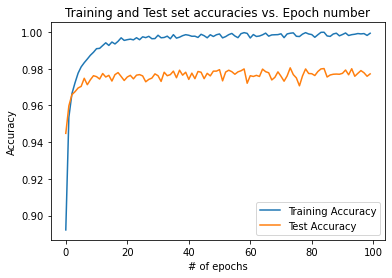

In [23]:
plt.plot(training_acc, label = "Training Accuracy")
plt.plot(test_acc, label = "Test Accuracy")
# naming the x axis 
plt.xlabel('# of epochs') 
# naming the y axis 
plt.ylabel('Accuracy')
# giving a title to my graph 
plt.title('Training and Test set accuracies vs. Epoch number')
# show a legend on the plot 
plt.legend() 
# function to show the plot 
plt.show()

In [24]:
# reporting of the results
score = model_multilayer.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1853315681219101
Test accuracy: 0.9771999716758728


In [25]:
del model_multilayer